In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train Dataset
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#  EDA

As we can see Date_of_Journey is a object type.Therefore,we have to convert this datatype into 
datetime so that we can use this column properly for prediction.


In [8]:
df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10682, dtype: object

In [9]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [11]:
# since we have extract values of Date_of_Journey so we can drop Date_of_Journey Column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [13]:
# coverting datatype into Integer 
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int32 
 11  Month            10682 non-null  int32 
 12  Year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 1.0+ MB


In [15]:
# Arrival Time is when the plane pulls up to gate
# we can seprate Arrival_Time column With Arrival_Time_hours and Arrival_Time_minutes

In [16]:
df['Arrival_Time'].apply(lambda x : x.split (' ')[0])

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [17]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split (' ')[0])

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [20]:
#Extracting hour
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]

In [21]:
# extracting mintues
df['Arrival_minutes']=df['Arrival_Time'].str.split(':').str[1]

In [22]:
# since we have extract values of Arrival_Time so we can drop Arrival_Time Column
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [24]:
# coverting datatype into Integer
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_minutes']=df['Arrival_minutes'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Year             10682 non-null  int32 
 12  Arrival_hour     10682 non-null  int32 
 13  Arrival_minutes  10682 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 1.0+ MB


In [26]:
# Dep_Time is when a plane leaves the gate
# we can extract values of Dep_Time into hours and minutes

In [27]:
#extracting hours
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]

In [28]:
#extracting minutes
df['Dep_minutes']=df['Dep_Time'].str.split(':').str[1]

In [29]:
# since we have extract values of Dep_Time so we can drop Dep_Time Column
df.drop(['Dep_Time'],axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [31]:
# coverting datatype into Integer
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_minutes']=df['Dep_minutes'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   Month            10682 non-null  int32 
 10  Year             10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_minutes  10682 non-null  int32 
 13  Dep_hour         10682 non-null  int32 
 14  Dep_minutes      10682 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 1.0+ MB


In [33]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
# here we can assign manual value  to Total_Stops

In [35]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,' nan':5, '4 stops':4})

In [36]:
df['Total_Stops'].mode()[0]

1

In [37]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [39]:
# Route and Total_stops are related to each other so we can drop Route

In [40]:
df.drop(['Route'],axis=1,inplace=True)

In [41]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [42]:
# Time taken by plane to reach destination is called Duration.
## we can extract values of Duration into hours and minutes

In [43]:
# extracting hour
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
# extracting minute
df['Duration_minutes']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [44]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [45]:
# Here We are getting 5m in hour columns,so we are droping row were the Duration_hour=5m
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [46]:
df.drop(6474,axis=0,inplace=True)

In [47]:
# coverting datatype into Integer

In [48]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [49]:
df['Duration_minutes']=df['Duration_minutes'].fillna(0)

In [50]:
df['Duration_hour'].isnull().sum()

0

In [51]:
df['Duration_minutes']=df['Duration_minutes'].astype(int)

In [52]:
# since we have extract values of Duration so we can drop Duration Column
df.drop(['Duration'],axis=1,inplace=True)

In [53]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


# visualization

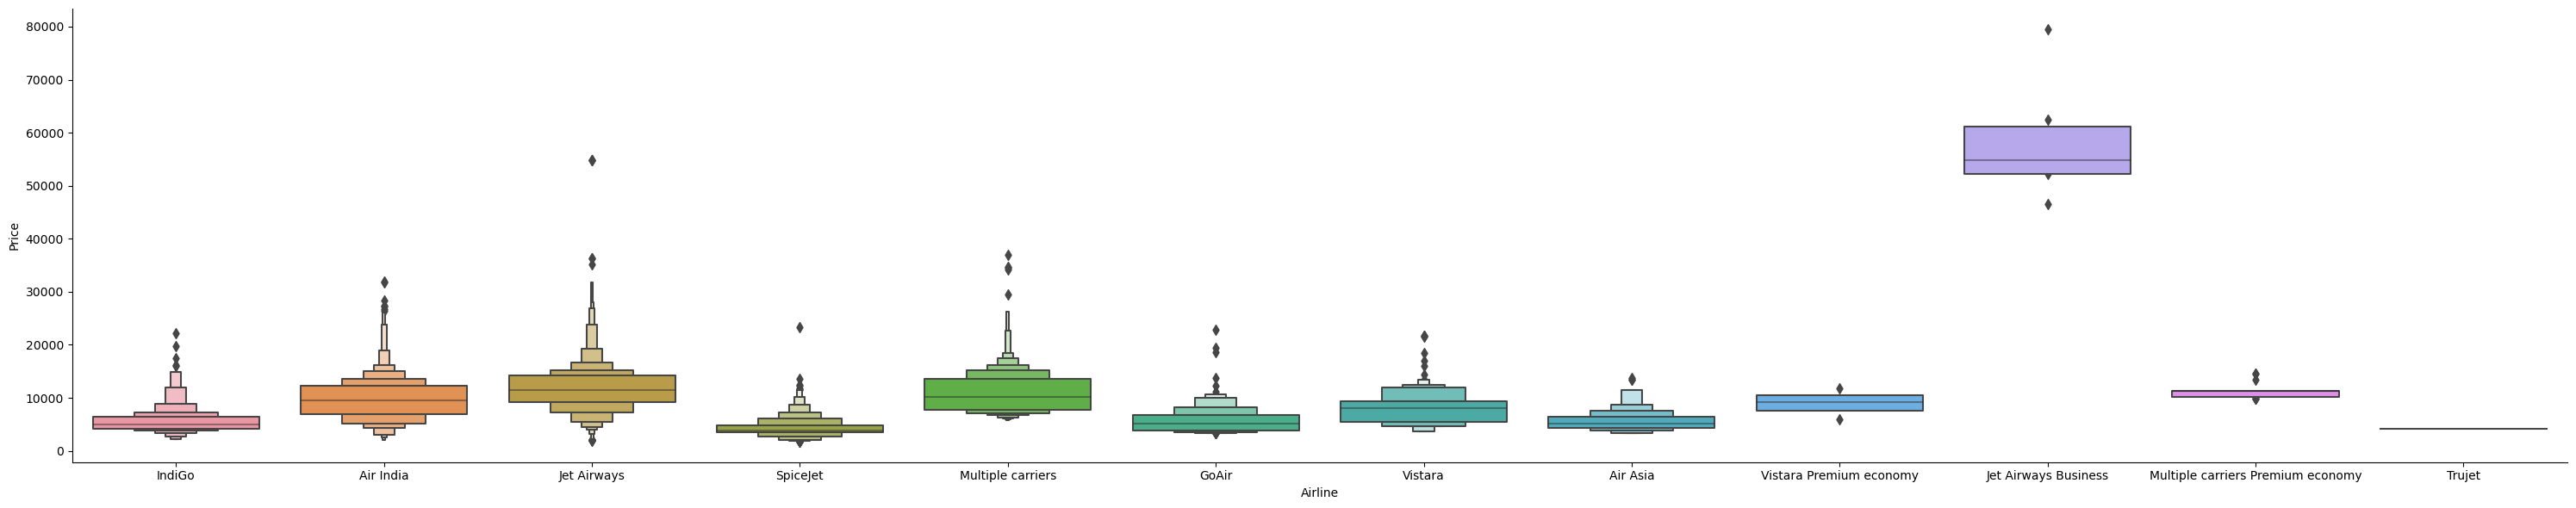

In [54]:
sns.catplot(y='Price',x='Airline',data=df,height=6,aspect=5,kind='boxen')
plt.show()


In [55]:
# from graph we can see Jet Airways buisness having highest price
# Apart from Jet Airways buisness all airways having similar price range


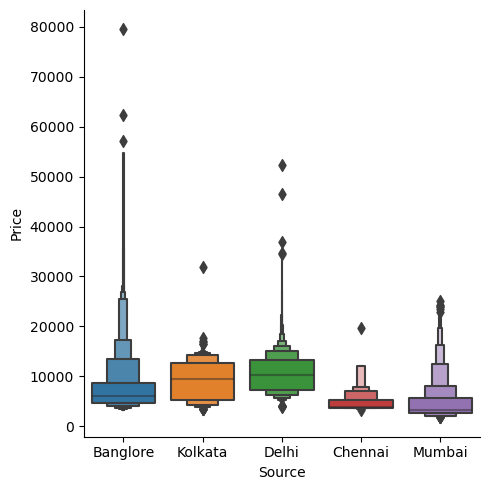

In [56]:
sns.catplot(y='Price',x='Source',data=df,kind='boxen')
plt.show()


In [57]:
# from the graph we can see all the prices are same but banglore ticket price have some outlier and price is 80000

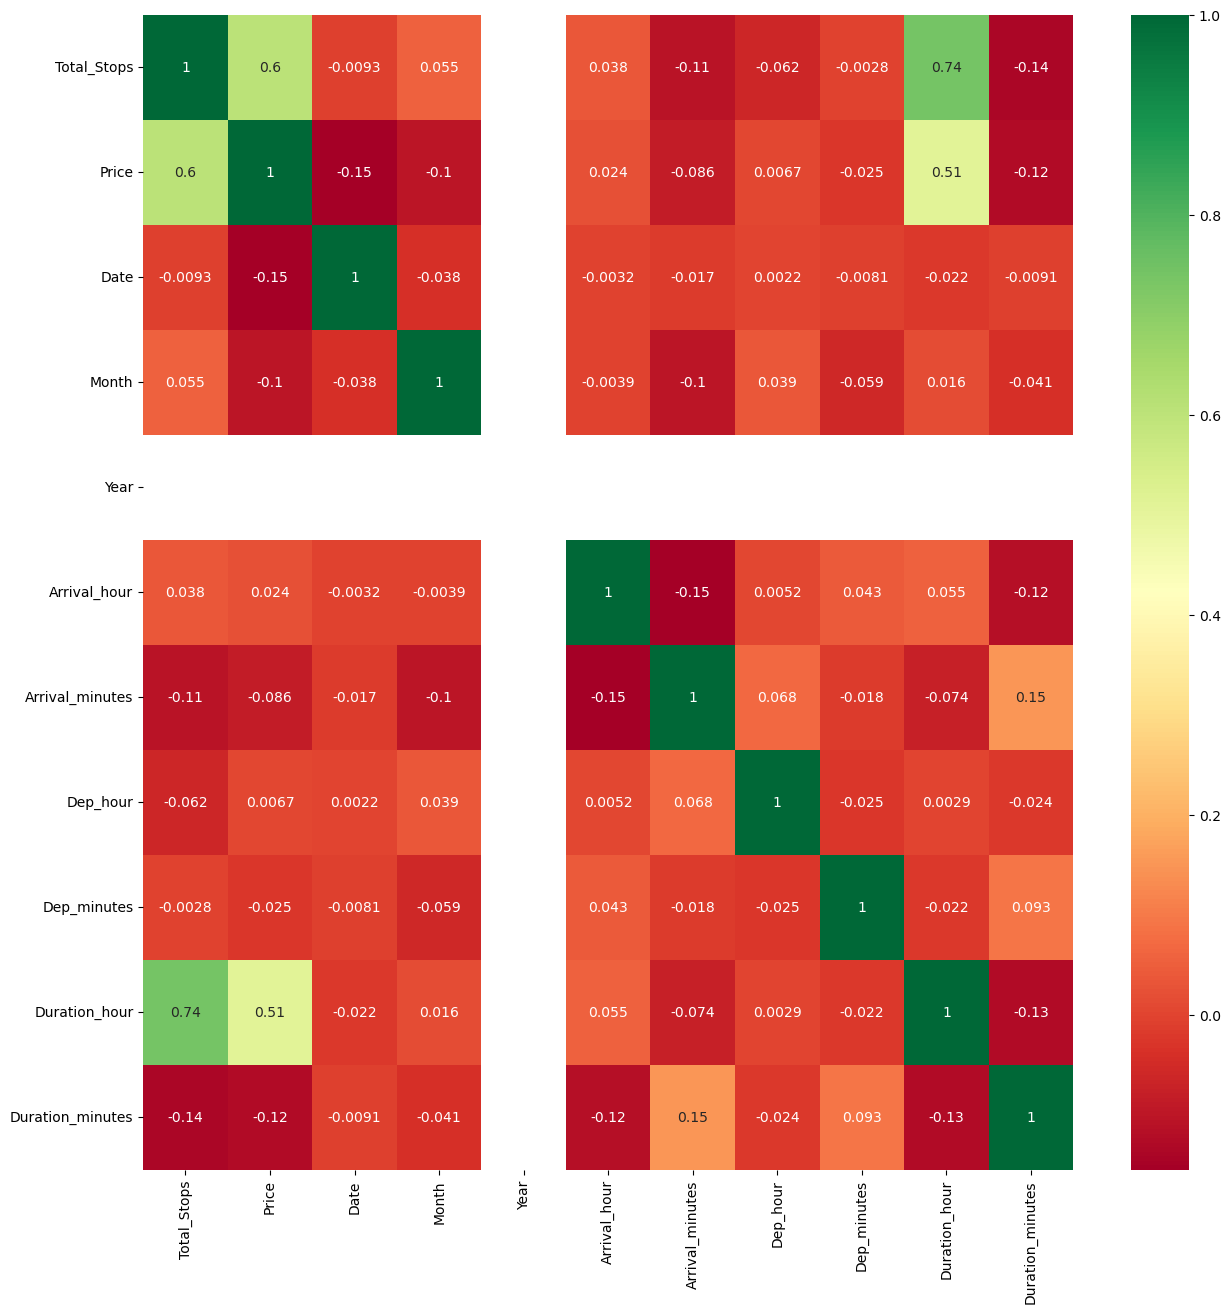

In [58]:
# find Correlation Independent and Dependent attribute
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


plt.show()

In [59]:
# Here we are doing label Encoding  to convert categorical variables into numerical format.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [60]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4,45


In [61]:
# Test Dataset
df1=pd.read_excel('Test_set.xlsx')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [63]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Eda for test dataset as similar to Train dataset

In [64]:
#As we can see Date_of_Journey is a object type.Therefore,we have to convert this datatype into datetime so that we can use this column properly for prediction.
df1['Date_of_Journey'].str.split('/').str[0]
df1['Date']=df1['Date_of_Journey'].str.split('/').str[0]
df1['Month']=df1['Date_of_Journey'].str.split('/').str[1]
df1['Year']=df1['Date_of_Journey'].str.split('/').str[2]
# since we have extract values of Date_of_Journey so we can drop Date_of_Journey Column
df1.drop(['Date_of_Journey'],axis=1,inplace=True)
# coverting datatype into Integer 
df1['Date']=df1['Date'].astype(int)
df1['Month']=df1['Month'].astype(int)
df1['Year']=df1['Year'].astype(int)

In [65]:
# Arrival Time is when the plane pulls up to gate
# we can seprate Arrival_Time column With Arrival_Time_hours and Arrival_Time_minutes
df1['Arrival_Time'].apply(lambda x : x.split (' ')[0])
df1['Arrival_Time']=df1['Arrival_Time'].apply(lambda x : x.split (' ')[0])
#Extracting hour
df1['Arrival_hour']=df1['Arrival_Time'].str.split(':').str[0]
# extracting mintues
df1['Arrival_minutes']=df1['Arrival_Time'].str.split(':').str[1]
# since we have extract values of Arrival_Time so we can drop Arrival_Time Column
df1.drop(['Arrival_Time'],axis=1,inplace=True)
# coverting datatype into Integer
df1['Arrival_hour']=df1['Arrival_hour'].astype(int)
df1['Arrival_minutes']=df1['Arrival_minutes'].astype(int)


In [66]:
# Dep_Time is when a plane leaves the gate
# we can extract values of Dep_Time into hours and minutes
#extracting hours
df1['Dep_hour']=df1['Dep_Time'].str.split(':').str[0]
#extracting minutes
df1['Dep_minutes']=df1['Dep_Time'].str.split(':').str[1]
# since we have extract values of Dep_Time so we can drop Dep_Time Column
df1.drop(['Dep_Time'],axis=1,inplace=True)
# coverting datatype into Integer
df1['Dep_hour']=df1['Dep_hour'].astype(int)
df1['Dep_minutes']=df1['Dep_minutes'].astype(int)

In [67]:
df1['Total_Stops'].unique()
# here we can assign manual value  to Total_Stops
df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [68]:
# Route and Total_stops are related to each other so we can drop Route
df1.drop(['Route'],axis=1,inplace=True)

In [69]:
# Time taken by plane to reach destination is called Duration.
## we can extract values of Duration into hours and minutes
# extracting hour
df1['Duration_hour']=df1['Duration'].str.split(' ').str[0].str.split('h').str[0]
# extracting minute
df1['Duration_minutes']=df1['Duration'].str.split(' ').str[1].str.split('m').str[0]
# Here We are getting 5m in hour columns,so we are droping row were the Duration_hour=5m
df1[df1['Duration_hour']=='5m']
df1.drop(2660,axis=0,inplace=True)
# coverting datatype into Integer
df1['Duration_hour']=df1['Duration_hour'].astype(int)
df1['Duration_minutes']=df1['Duration_minutes'].fillna(0)
df1['Duration_minutes']=df1['Duration_minutes'].astype(int)
# since we have extract values of Duration so we can drop Duration Column
df1.drop(['Duration'],axis=1,inplace=True)

In [70]:
# Here we are doing label Encoding  to convert categorical variables into numerical format.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Airline']=le.fit_transform(df1['Airline'])
df1['Source']=le.fit_transform(df1['Source'])
df1['Destination']=le.fit_transform(df1['Destination'])
df1['Additional_Info']=le.fit_transform(df1['Additional_Info'])

In [71]:
df1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
0,4,2,1,1,5,6,6,2019,4,25,17,30,10,55
1,3,3,0,1,5,12,5,2019,10,20,6,20,4,0
2,4,2,1,1,3,21,5,2019,19,0,19,15,23,45
3,6,2,1,1,5,21,5,2019,21,0,8,0,13,0
4,0,0,2,0,5,24,6,2019,2,45,23,55,2,50


In [72]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=123)


In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [77]:
reg1=LogisticRegression()
reg2=DecisionTreeRegressor()
reg3=RandomForestRegressor()
reg4=AdaBoostRegressor()
reg5= BaggingRegressor()
reg6=KNeighborsRegressor()
reg7=DecisionTreeRegressor(max_depth=8)

In [78]:
from sklearn.metrics import r2_score,mean_squared_error


In [79]:
def model_building(model): 
    model.fit(X_train_scaled,Y_train)
    y_pred_train=model.predict(X_train_scaled)
    y_pred_test=model.predict(X_test_scaled)
    print('train data')
    print(r2_score(Y_train,y_pred_train))
    print('test data')
    print(r2_score(Y_test,y_pred_test))


In [80]:
print('LogisticRegression')
model_building(reg1)

LogisticRegression
train data
0.5895509012993994
test data
0.5197332298116357


In [81]:
print ('DecisionTreeRegressor')
model_building(reg2)

DecisionTreeRegressor
train data
0.9961521330991283
test data
0.8555891544936408


In [82]:
print('RandomForestRegressor')
model_building(reg3)

RandomForestRegressor
train data
0.9786463072973837
test data
0.90857089725455


In [83]:
print('AdaBoostRegressor')
model_building(reg4)

AdaBoostRegressor
train data
0.3182633611235892
test data
0.24477965410287994


In [84]:
print('BaggingRegressor')
model_building(reg5)

BaggingRegressor
train data
0.9733511963544096
test data
0.9045550809642959


In [85]:
print('KNeighborsRegressor')
model_building(reg6)

KNeighborsRegressor
train data
0.8541269797784912
test data
0.769254332006389


In [86]:
print('DecisionTreeClassifier(max_depth=8)')
model_building(reg7)

DecisionTreeClassifier(max_depth=8)
train data
0.8347878695667968
test data
0.8041065103483598


In [87]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_minutes,Duration_hour,Duration_minutes
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4,45


In [88]:
input=[[1,0,4,3,8,15,8,2020,5,30,6,45,8,25]]
array=np.array(input)

In [89]:
array

array([[   1,    0,    4,    3,    8,   15,    8, 2020,    5,   30,    6,
          45,    8,   25]])

In [90]:
std_input=sc.transform(input)

In [91]:
std_input

array([[-1.24552439, -1.68321295,  1.79088575,  3.30600575,  0.49759825,
         0.15538542,  2.83308565,  1.        , -1.23742259,  0.32904875,
        -1.13365975,  1.07769934, -0.25441091, -0.19917596]])

In [92]:
prediction=reg7.predict(std_input)

In [93]:
prediction

array([11233.97142857])